<div style="text-align: left; background-color:#FFFFCC; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">Lab 01:Data visualization with Python</div>
<div style="text-align: left; background-color:#99FFFF; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">Bộ môn: Trực quan hóa dữ liệu | Nhóm 8</div>

# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">PHẦN 2. Trực quan hóa dữ liệu</div>

# Import các thư viện cần thiết

In [1]:
#!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/BA_Reviews_processed.csv")

In [4]:
df.head()

OverallRating                              ReviewHeader              Name  \
0            1.0    "Service level far worse then Ryanair"           L Keele   
1            3.0  "do not upgrade members based on status"      Austin Jones   
2            8.0             "Flight was smooth and quick"        M A Collie   
3            1.0             "Absolutely hopeless airline"        Nigel Dean   
4            1.0        "Customer Service is non existent"  Gaylynne Simpson   

     Datetime  VerifiedReview  \
0  2023-11-19            True   
1  2023-11-19            True   
2  2023-11-16           False   
3  2023-11-16            True   
4  2023-11-14           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route   DateFlown  SeatComfort  \
0   Economy Class        London to Stuttgart  2023-11-23          1.0   
1   Economy Class         Brussels to London  2023-11-23          2.0   
2  Business Class  London Heathrow to Dublin  2023-11-23          3.0   
3   Economy Class           London to Dublin  2023-12-22          3.0   
4   Economy Class           London to Lisbon  2023-11-23          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft  \
0                1.0            1.0            1.0          no      NaN   
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment  
0             3.0                    3.0  
1             1.0                    2.0  
2             4.0                    3.0  
3             3.0                    3.0  
4             1.0                    1.0

# Trực quan hóa dữ liệu

## Biểu đồ 1
   + Tiêu đề: Tỉ lệ đánh giá tốt, trung bình, kém dành cho hãng
   + Loại biểu đồ: Doughnut chart
   + Lý do chọn : Doughnut chart là một cách hiệu quả để thể hiện tỉ lệ của các mức đánh giá dựa trên đánh giá của người dùng.

In [5]:
# Phân loại đánh giá dựa trên OverallRating
def get_type_of_sentiment(data):
    if data > 7: # 8-10: Tốt
        return 'Positive'
    elif data < 5: # 1-4: Kém
        return 'Negative'
    else: # 5-7: Trung bình
        return 'Neutral'
df_copy = df.copy() 
df_copy['sentiment'] = df_copy['OverallRating'].apply(get_type_of_sentiment)
df_copy.head()

OverallRating                              ReviewHeader              Name  \
0            1.0    "Service level far worse then Ryanair"           L Keele   
1            3.0  "do not upgrade members based on status"      Austin Jones   
2            8.0             "Flight was smooth and quick"        M A Collie   
3            1.0             "Absolutely hopeless airline"        Nigel Dean   
4            1.0        "Customer Service is non existent"  Gaylynne Simpson   

     Datetime  VerifiedReview  \
0  2023-11-19            True   
1  2023-11-19            True   
2  2023-11-16           False   
3  2023-11-16            True   
4  2023-11-14           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route   DateFlown  SeatComfort  \
0   Economy Class        London to Stuttgart  2023-11-23          1.0   
1   Economy Class         Brussels to London  2023-11-23          2.0   
2  Business Class  London Heathrow to Dublin  2023-11-23          3.0   
3   Economy Class           London to Dublin  2023-12-22          3.0   
4   Economy Class           London to Lisbon  2023-11-23          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft  \
0                1.0            1.0            1.0          no      NaN   
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment sentiment  
0             3.0                    3.0  Negative  
1             1.0                    2.0  Negative  
2             4.0                    3.0  Positive  
3             3.0                    3.0  Negative  
4             1.0                    1.0  Negative

In [6]:
# Phân bố của các mức đánh giá
sentiment_distribution = df_copy['sentiment'].value_counts(normalize=True)
sentiment_distribution

Negative    0.528424
Positive    0.272334
Neutral     0.199242
Name: sentiment, dtype: float64

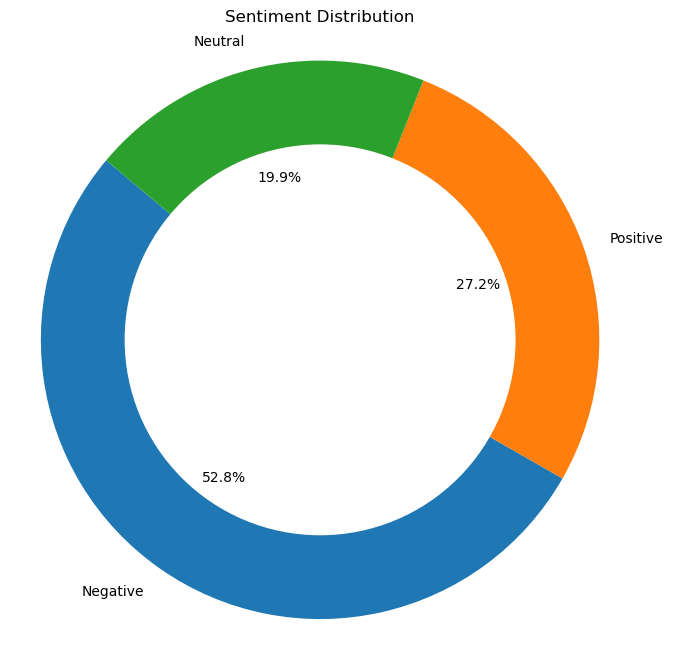

In [7]:
# Tạo biểu đồ doughnut
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.show()

### Nhận xét:
- Đánh giá tiêu cực chiếm tỷ lệ cao nhất, với 45,86%. Đây là tỷ lệ tương đối cao so với các hãng hàng không khác. Có thể có một số yếu tố dẫn đến đánh giá tiêu cực, chẳng hạn như sự chậm trễ chuyến bay, hủy chuyến, dịch vụ khách hàng kém, vấn đề về chỗ ngồi hoặc giá cả không hợp lý.
- Đánh giá tích cực chiếm tỷ lệ 27,23%. Điều này cho thấy vẫn có tương đối nhiều khách hàng hài lòng với dịch vụ của British Airways. 
- Nhìn chung, biểu đồ cho thấy British Airways nhận được nhiều đánh giá tiêu cực hơn tichs cực. Điều này cho thấy hãng hàng không cần cải thiện một số khía cạnh dịch vụ để đáp ứng tốt hơn nhu cầu của khách hàng.
- Ngoài ra, biểu đồ cũng cho thấy một số điểm sau:

    - Có sự chênh lệch đáng kể giữa tỷ lệ đánh giá tích cực và tiêu cực. Điều này cho thấy rằng có hai nhóm khách hàng có ý kiến khác nhau về dịch vụ của British Airways.
    - Tỷ lệ đánh giá trung lập tương đối cao. Điều này cho thấy rằng có một số khách hàng không có ý kiến ​​rõ ràng về dịch vụ của British Airways.

## Biểu đồ 2
- Tiêu đề: Tỉ lệ các tầng lớp khách hàng sử dụng hãng máy bay.

- Loại biểu đồ: TreeMap

- Lý do lựa chọn: Để so sánh tỉ lệ sự phân bố của các cấp độ trong công việc có trong thuộc tính 'SeatType', thì biểu đồ TreeMap là một lựa chọn phù hợp. Vì TreeMap là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các hình chữ nhật có diện tích khác nhau, trong đó độ lớn của hình chữ nhật sẽ đại diện cho giá trị lượng của một biến. Ta sẽ biểu diễn số lượng các giá trị có trong thuộc tính 'SeatType' bằng diện tích các hình chữ nhật.



In [8]:
plot_df = df.copy()
plot_df['SeatType'] = pd.Categorical(plot_df['SeatType'])

plot_df = plot_df['SeatType'].value_counts()

fig = px.treemap(plot_df, 
                 path=[plot_df.index],
                 values=plot_df.values, 
                 title = 'Distribution of Seat Type',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100*plot_df.values / sum(plot_df.values)).tolist(),2)

fig.data[0].customdata = percents
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

### Nhận xét

Từ biểu đồ TreeMap, ta thấy:
- **Economy Class** (vị trí cho khách hàng phổ thông) chiếm số lượng lớn nhất với 1927 khách hàng (chiếm 52.1%), tương ứng với hình chữ nhật có diện tích lớn nhất. Xếp ngay sau đó là **Business Class** với 1198 khách hàng (chiếm 32.39%).
- Chiếm tỉ lệ ít nhất **First Class** (vị trí cao cấp nhất) với 213 khách hàng (chiếm 5.76%).

Tầng lớp khách hàng càng cao thì càng ít khách hàng.

## Biểu đồ 3
- Tiêu đề: Tỉ lệ recommend của khách hàng.

- Loại biểu đồ: Pie chart (biểu đồ tròn).

- Lý do lựa chọn: 
    - Pie chart là lựa chọn hợp lí vì nó cấp cho chúng ta cái nhìn tổng thể về tỷ lệ của các phần khác nhau tạo thành một tập dữ liệu.

    - Tuy nhiên, khi có quá nhiều phần tử cần hiển thị, trực quan hóa với Pie Chart có thể trở nên khó hiểu và làm giảm tính rõ ràng của dữ liệu. Ở đây thuộc tính Recommended chỉ có 2 giá trị là Yes và No nên pie chart sẽ thể hiện được hết khả năng trực quan hóa của nó.


In [9]:
#Tạo dữ liệu
plot_df = df.copy()
plot_df= plot_df['Recommended'].value_counts()

#Trực quan hóa
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=plot_df.values,labels=plot_df.index),row=1,col=2)

fig.update_traces(hoverinfo='label',
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ["Pink","Blue"],
                              line = dict(color = 'white',
                                          width = 2)))
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/viz.jpg",
        xref="paper",
        yref="paper",
        x=0.5, y=0.20,
        sizex=0.6, sizey=1,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.update_layout(title ={'text' : "<b>Whether the customer recommends British Airways</b>", 
                          'x' : 0.21},
                    template = 'xgridoff',
                    width = 900, height = 600,
                    legend=dict(title_font_family="Times New Roman",
                                font=dict(family="Courier",size=25,color="black" ),
                    bgcolor="#EFFAD3",
                    bordercolor="Black",
                    borderwidth=2.5)
                 )
iplot(fig)

### Nhận xét: 
- Số lượng recommend **No** của khách hàng về hãng hàng không chiếm tỉ lệ nhiều hơn recommend **Yes** (hơn 19%).

## Biểu đồ 4
- Tiêu đề: số lượng các loại hành khách TypeOfTraveller của hãng hàng không này.
- Loại biểu đồ: Cột
- Lý do chọn:
    - Dễ đọc và hiểu: Biểu đồ cột là một công cụ trực quan và dễ hiểu. Nó sử dụng các cột đứng để so sánh các giá trị, giúp người đọc dễ dàng so sánh số lượng của từng loại hành khách một cách nhanh chóng.
    - Thích hợp cho dữ liệu rời rạc: Dữ liệu về số lượng loại hành khách là rời rạc và không liên tục, điều này làm cho biểu đồ cột là một lựa chọn phù hợp. Mỗi cột biểu đồ biểu diễn một loại hành khách cụ thể mà không có các giá trị liên tục nằm giữa chúng.
    - Dễ thấy sự khác biệt: Biểu đồ cột thường rất hiệu quả trong việc nắm bắt sự khác biệt giữa các nhóm. Bằng cách so sánh chiều cao của các cột, chúng ta có thể dễ dàng nhận ra loại hành khách nào có số lượng lớn nhất và nhỏ nhất một cách nhanh chóng.
    - Thích hợp cho các nhóm dữ liệu: Trong trường hợp này, chúng ta có một số nhóm loại hành khách cụ thể (ví dụ: Business, Leisure), và biểu đồ cột là một cách hiệu quả để thể hiện mỗi nhóm một cách rõ ràng và so sánh chúng với nhau.

In [10]:
# Đếm số lượng mẫu của mỗi loại hành khách
traveler_count = df['TypeOfTraveller'].value_counts()
traveler_count

Couple Leisure    1000
Solo Leisure       891
Business           641
Family Leisure     398
Name: TypeOfTraveller, dtype: int64

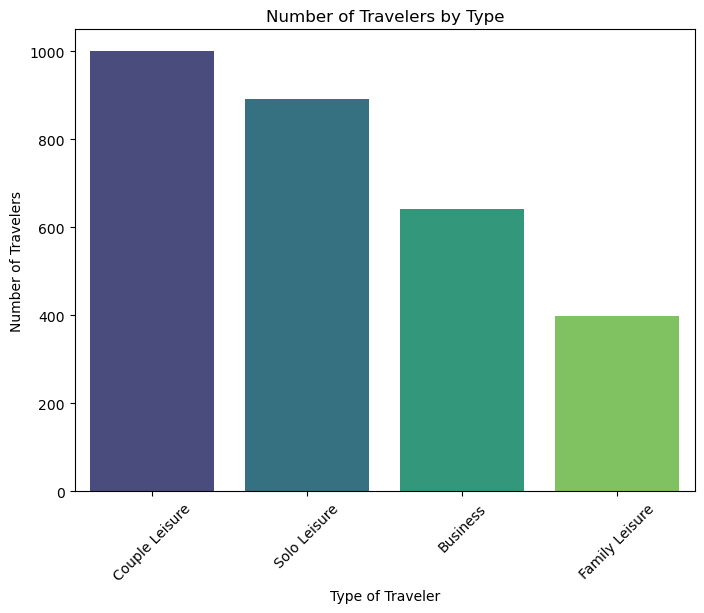

In [11]:
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=traveler_count.index, y=traveler_count.values, hue=traveler_count.index, palette='viridis', legend=False)
plt.title('Number of Travelers by Type')
plt.xlabel('Type of Traveler')
plt.ylabel('Number of Travelers')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.show()

### Nhận xét:
- Nhìn vào biểu đồ ta có thể nhận thấy hãng hàng không British Airways có loại hành khách là Couple Leisure (Các cặp đôi không phải đi kinh doanh) chiếm đa số (1000 cặp) và chiếm ít nhất là Family Leisure (398 gia đình).
- Loại hành khách cao thứ 2 và thứ 3 lần lượt là Solo Leisure và Business (861 và 641).
- Xu hướng: Từ biểu đồ, ta có thể thấy rằng xu hướng du lịch trong thời gian qua có sự thay đổi. Số lượng khách du lịch nghỉ dưỡng theo cặp và du lịch nghỉ dưỡng một mình đang tăng lên, trong khi số lượng khách du lịch công tác và du lịch nghỉ dưỡng gia đình đang giảm xuống.

## Biểu đồ 5
- Tiêu đề: Phân tích biến động điểm đánh giá chuyến bay theo năm.
- Loại biểu đồ: Line chart.
- Lý do chọn:
- Đánh giá xu hướng và biến động: Biểu đồ đường là công cụ mạnh mẽ để phản ánh sự thay đổi của điểm đánh giá chuyến bay qua các năm. Dữ liệu điểm đánh giá chuyến bay thường có tính chất liên tục và thay đổi theo thời gian. Biểu đồ đường giúp chúng ta nhìn nhận rõ ràng xu hướng tăng giảm của điểm đánh giá theo từng năm, giúp dễ dàng nhận biết sự phát triển hoặc giảm sút của chất lượng dịch vụ.
- Dễ hiểu và trực quan: Biểu đồ đường giúp người đọc nhanh chóng nhận biết xu hướng tăng giảm của chất lượng dịch vụ theo thời gian. Sự biến đổi của điểm đánh giá được minh họa một cách trực quan thông qua các đường cong, giúp người đọc nhanh chóng hiểu được diễn biến chung của chất lượng dịch vụ qua các năm.

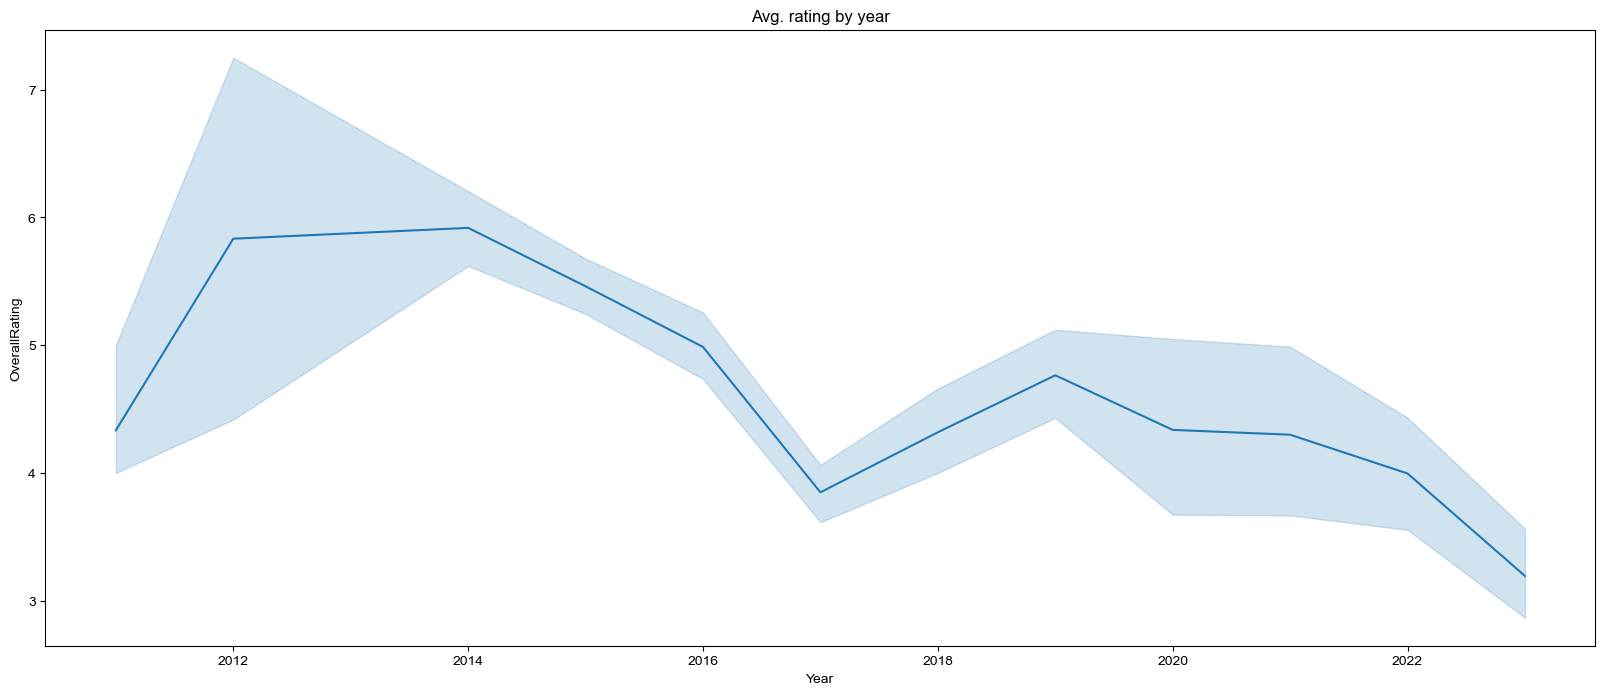

In [12]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year']=(df['Datetime']).dt.year
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df).set_title('Avg. rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

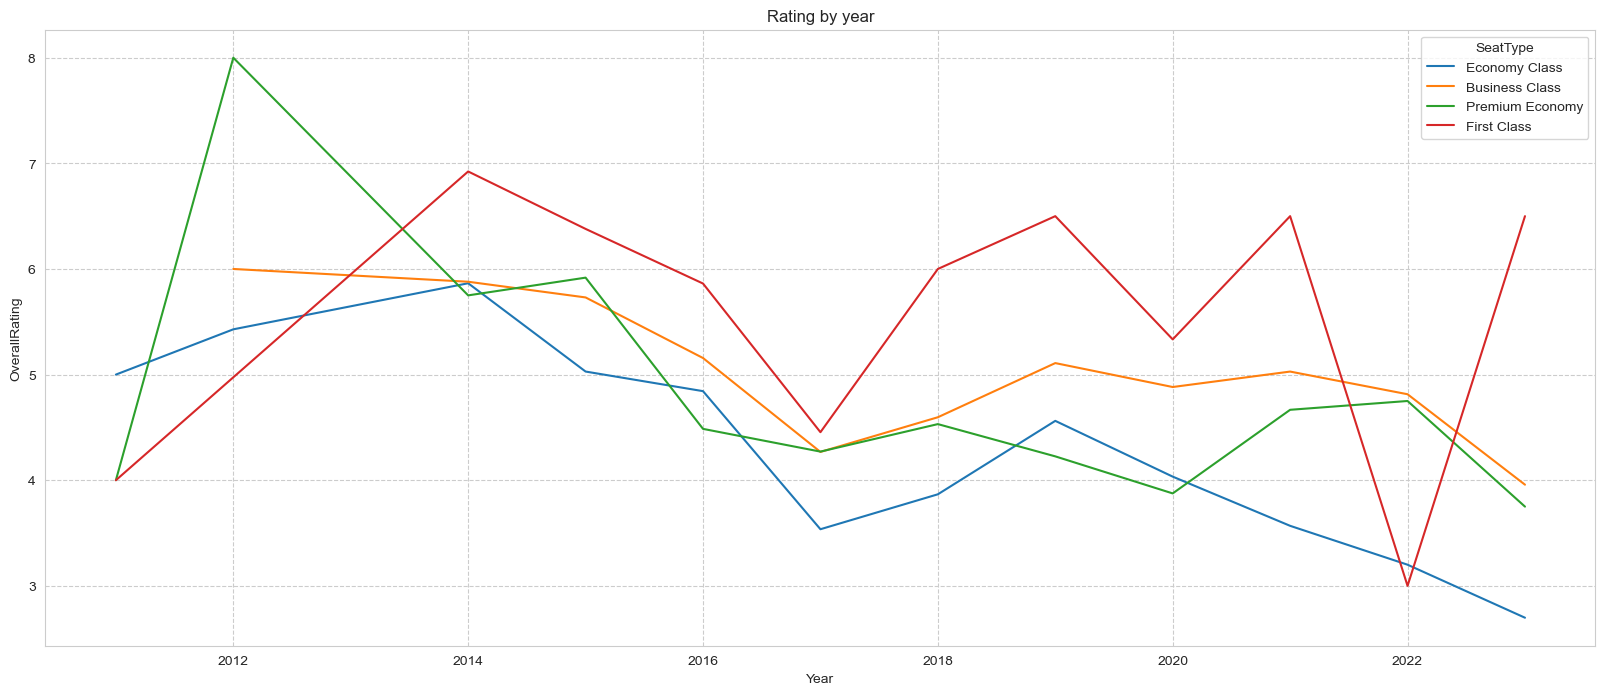

In [13]:
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df, hue='SeatType', errorbar=None).set_title('Rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

### Nhận xét:

- Tổng quan, điểm đánh giá của các hạng ghế dường như đã nhẹ nhàng giảm trong khoảng thời gian từ năm 2012 đến năm 2022.
- Hạng phổ thông thường có điểm đánh giá thấp hơn so với các hạng ghế khác. Điều này có thể là do hành khách bay ở hạng phổ thông thường gặp phải ít tiện nghi hơn và không có nhiều không gian cho chân hơn so với hành khách ở các hạng cabin khác.
- Hạng thương gia dường như đã ổn định vào năm 2020 và 2022 sau một giai đoạn tăng nhẹ từ năm 2017.
- Cả hạng phổ thông cao cấp và hạng nhất có vẻ có xu hướng biến động nhiều nhất, tuy nhiên, cả hai hạng ghế này luôn đạt được điểm đánh giá trung bình cao nhất trong các loại hạng ghế. Nguyên nhân có thể là những tiện ích mà cả hai hạng ghế này mang lại cho khách hàng.

## Biểu đồ 6
- Tiêu đề: Phản ánh ý kiến qua Đám mây từ
- Loại biểu đồ: Đám mây từ (WordCloud)
- Lý do lựa chọn:
    - Trực quan và tiện dụng: Đám mây từ là một công cụ trực quan mạnh mẽ, nhanh chóng thu hút sự chú ý của người xem. Sự kết hợp của kích thước chữ và màu sắc tạo nên một hình ảnh độc đáo và dễ nhìn.
    - Phù hợp với dữ liệu văn bản: Với dữ liệu văn bản như đánh giá, đám mây từ là lựa chọn lý tưởng để thể hiện tần suất xuất hiện của các từ và cụm từ khác nhau.
    - Tập trung vào những từ quan trọng: Bằng cách làm nổi bật các từ quan trọng thông qua kích thước và màu sắc, đám mây từ giúp người xem nhanh chóng nhận ra những chủ đề chính và ý kiến phổ biến nhất trong đánh giá.
    - Tạo ấn tượng mạnh mẽ: Thay vì chỉ liệt kê các tiêu đề đánh giá, đám mây từ tạo ra một hình ảnh mạnh mẽ và độc đáo, gợi lên sự tò mò và khám phá của người xem.

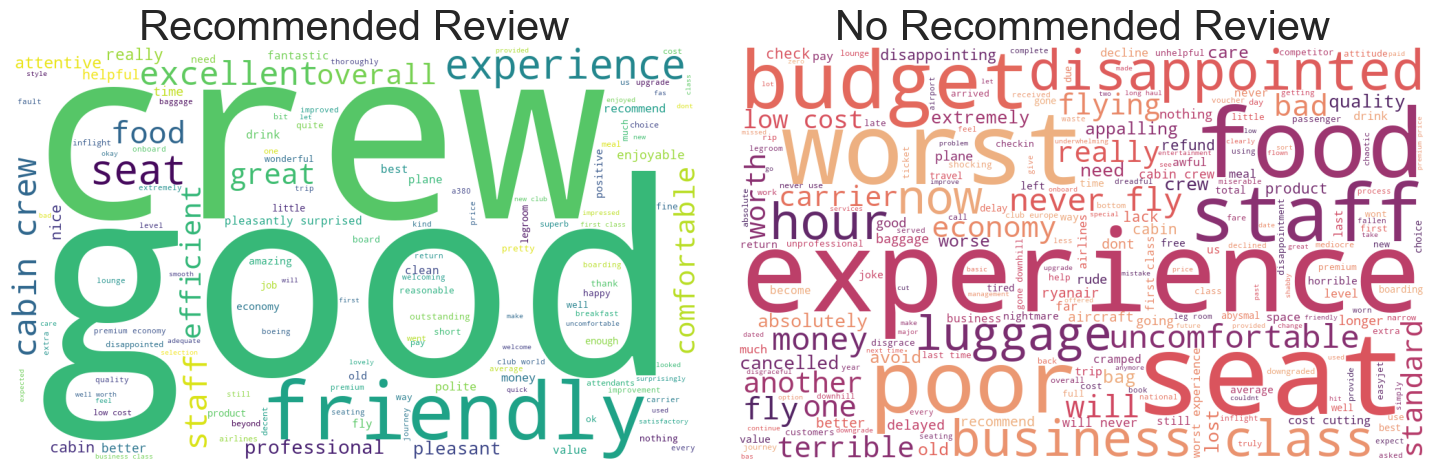

In [14]:
from wordcloud import WordCloud

def create_cloud(text):
    stopwords = ['British', 'british', 'Airways', 'airways', 'airline', 'customer', 'review',
                 'flights', 'flight', 'Service', 'service', 'BA', 'ba']
    comment_words = ' '
    
    for val in text:
        val = str(val)
        tokens = val.split(" ")
        
        for i in range(len(tokens)):
            tokens[i] = ''.join(filter(str.isalnum, tokens[i])).lower()
        
        for words in tokens:
            if words not in stopwords:
                comment_words = comment_words + words + ' '

    return comment_words
        
recommend = df[df['Recommended']=='yes']['ReviewHeader'].values
no_recommend = df[df['Recommended']=='no']['ReviewHeader'].values

wordcloud_recommend = WordCloud(background_color="white", max_words=300, min_font_size = 10, 
                                width=1000, height=600).generate(create_cloud(recommend))
wordcloud_norecommend = WordCloud(background_color="white", max_words=300, colormap='flare', min_font_size = 10, 
                                  width=1000, height=600).generate(create_cloud(no_recommend))
                                             
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_recommend)
axes[0].axis('off')
axes[0].set_title('Recommended Review', fontsize=30)
axes[1].imshow(wordcloud_norecommend)
axes[1].axis('off')
axes[1].set_title('No Recommended Review', fontsize=30)
plt.tight_layout(pad=3)
plt.show()

### Nhận xét:

- Trong quá trình phân tích đánh giá từ khách hàng, các yếu tố quan trọng như đội ngũ nhân viên, chất lượng dịch vụ và sự thoải mái đã được nêu bật một cách rõ ràng. Các từ khóa như "crew", "good", "friendly", "comfortable",... đặc biệt nổi bật, cho thấy sự chú ý và đánh giá tích cực từ phía hành khách.
- Tuy nhiên, không thể phủ nhận rằng có những đánh giá tiêu cực cũng được đưa ra, như "uncomfortable seat", "bad staff", "poor budget", "worst food", "disappointed", "business class",... Những phản hồi này cũng cần được chú ý, bởi chúng có thể là dấu hiệu của những vấn đề tiềm ẩn hoặc cần cải thiện trong trải nghiệm của khách hàng.
- Từ các từ khóa được nêu bật trong phân tích từ, có thể nhận thấy rằng hãng hàng không cần phải tiếp tục quan sát và điều chỉnh chính sách, dịch vụ của mình một cách chính xác và linh hoạt để nâng cao chất lượng và đáp ứng được mong đợi của khách hàng. Điều này cần sự đầu tư và phản hồi tích cực từ phía công ty để duy trì và tăng cường uy tín và sự hài lòng của khách hàng.

## Biểu đồ 7:
- Tiêu đề: Đóng góp của từng hạng ghế trên tổng các chuyến bay theo từng năm
- Loại biểu đồ: Area Chart
- Lý do chọn: Area Chart là một cách có thể thể hiện sự thay đổi trên tổng thể theo thời gian một cách tốt nhất, chính vì thế sử dụng Area Chart để có thể dễ quan sát sự thay đổi về số lượng các hạng ghế trên tổng thể theo thời gian một cách trực quan hơn.

In [15]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year']=(df['Datetime']).dt.year
df.head()

OverallRating                              ReviewHeader              Name  \
0            1.0    "Service level far worse then Ryanair"           L Keele   
1            3.0  "do not upgrade members based on status"      Austin Jones   
2            8.0             "Flight was smooth and quick"        M A Collie   
3            1.0             "Absolutely hopeless airline"        Nigel Dean   
4            1.0        "Customer Service is non existent"  Gaylynne Simpson   

    Datetime  VerifiedReview  \
0 2023-11-19            True   
1 2023-11-19            True   
2 2023-11-16           False   
3 2023-11-16            True   
4 2023-11-14           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route   DateFlown  SeatComfort  \
0   Economy Class        London to Stuttgart  2023-11-23          1.0   
1   Economy Class         Brussels to London  2023-11-23          2.0   
2  Business Class  London Heathrow to Dublin  2023-11-23          3.0   
3   Economy Class           London to Dublin  2023-12-22          3.0   
4   Economy Class           London to Lisbon  2023-11-23          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft  \
0                1.0            1.0            1.0          no      NaN   
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment  Year  
0             3.0                    3.0  2023  
1             1.0                    2.0  2023  
2             4.0                    3.0  2023  
3             3.0                    3.0  2023  
4             1.0                    1.0  2023

In [16]:
seattype_df = df.pivot_table(index='Year', columns='SeatType', aggfunc='size', fill_value=0)
seattype_df

SeatType  Business Class  Economy Class  First Class  Premium Economy
Year                                                                 
2011                   0              1            1                1
2012                   4              7            0                1
2014                 182            207           26               48
2015                 256            347           58               73
2016                 153            287           58               72
2017                 168            334           22               48
2018                 104            165           23               32
2019                 101            210           14               31
2020                  34             59            3                8
2021                  35             44            2                6
2022                  86            105            2               20
2023                  71            159            4               20

Text(0.5, 1.0, 'Taking Part of SeatTypes Over Time')

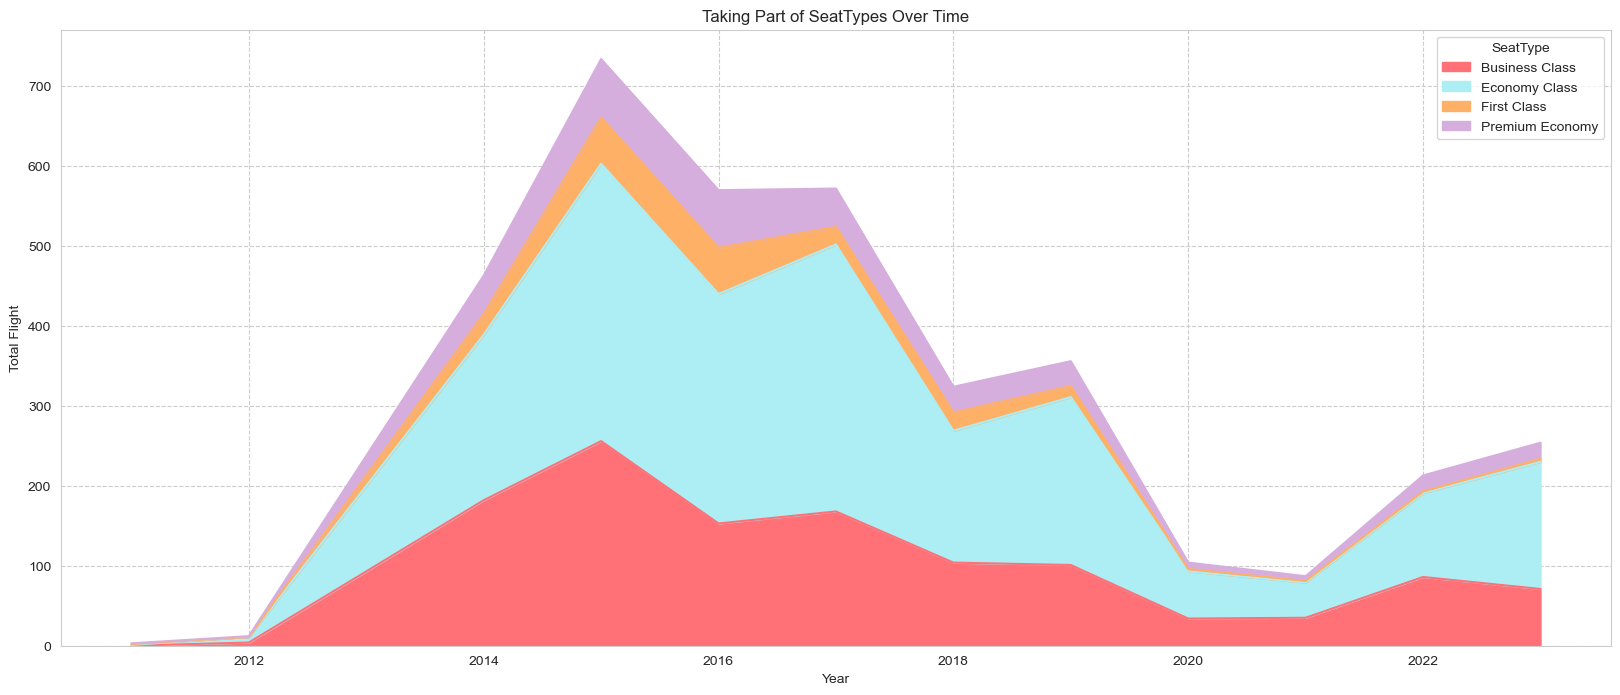

In [17]:
seattype_df.plot.area(color=['#ff7077', '#aceef3', '#ffb067', '#d6aedd'], figsize = (20,8))  
plt.xlabel('Year')
plt.ylabel('Total Flight')
plt.title('Taking Part of SeatTypes Over Time')

### Nhận xét:
- Nhìn tổng thể, ta thấy được rằng đóng góp của từng hạng ghế bay trên tổng thể ít khi thay đổi. Hạng ghế chiểm tỉ trọng cao nhất là Economy Class.
- Tổng số lượng chuyển bay tăng mạnh từ năm 2012 đến năm 2014, đạt đỉnh điểm là ở năm 2014, sau đó giảm nhẹ đến năm 2016 và bình ổn đến khoảng 2017.
- Từ sau năm 2017 đến khoảng 2021, số lượng tổng chuyến bay giảm mạnh, đặc biệt là số lượng của Economy Class. Các hạng ghế bay khác vẫn khá bình ổn nếu so với Economy Class
- Từ sau 2021 trở đi, số lượng tổng chuyến bay tăng trở lại, và ghế bay Business Class cũng tăng mạnh hơn so với vài năm trước đó. Số lượng ghế Premium Class cũng tăng nhưng số lượng First Class lại giảm đi đáng kể

## Biểu đồ 8
   + Tiêu đề: Điểm đánh giá trung bình với top 10 loại máy bay.
   + Loại biểu đồ: Bar chart
   + Lý do chọn : Bar chart là một cách hiệu quả để thể hiện sự so sánh giữa các loại máy bay dựa trên đánh giá của người dùng.

In [18]:
#Đếm số lần xuất hiện của mỗi loại máy bay và chọn top 10
top_aircraft = df['Aircraft'].value_counts().head(10).index.tolist()

#Tạo một DataFrame con chỉ chứa dữ liệu của top 10 loại máy bay
top_aircraft_df = df[df['Aircraft'].isin(top_aircraft)]

# Lấy số lần xuất hiện của từng giá trị
aircraft_counts = top_aircraft_df['Aircraft'].value_counts()

# Chuyển Series thành DataFrame
aircraft_counts_df = aircraft_counts.reset_index()

# Đặt tên cho các cột
aircraft_counts_df.columns = ['Aircraft', 'Count']

In [19]:
# Tạo một Dataframe mới chứa trung bình điểm đánh giá của từng loại phi cơ
avg_overall_group = pd.DataFrame()
avg_overall_group["Average Rating"] = top_aircraft_df.groupby("Aircraft")["OverallRating"].mean()

# Thêm cột Aircraft
avg_overall_group["Aircraft"] = avg_overall_group.index
avg_overall_group.reset_index(drop= True, inplace=True)

# Kết hợp 2 Dataframe đã tạo để có 1 Dataframe hoàn chỉnh
avg_overall_group = pd.merge(avg_overall_group, aircraft_counts_df, on='Aircraft')

# Lọc theo giá trị giảm dần của điểm đánh giá
avg_overall_group.sort_values("Average Rating", inplace=True, ascending=False)

In [20]:
print(avg_overall_group)

   Average Rating        Aircraft  Count
9        5.776119      Boeing 787     67
3        5.596386            A380    166
8        5.416000  Boeing 777-200    125
0        5.266055            A319    109
5        5.087912  Boeing 747-400    182
1        4.939891            A320    366
2        4.937500            A321     80
6        4.634146      Boeing 767     41
7        4.621324      Boeing 777    272
4        4.352941      Boeing 747     85


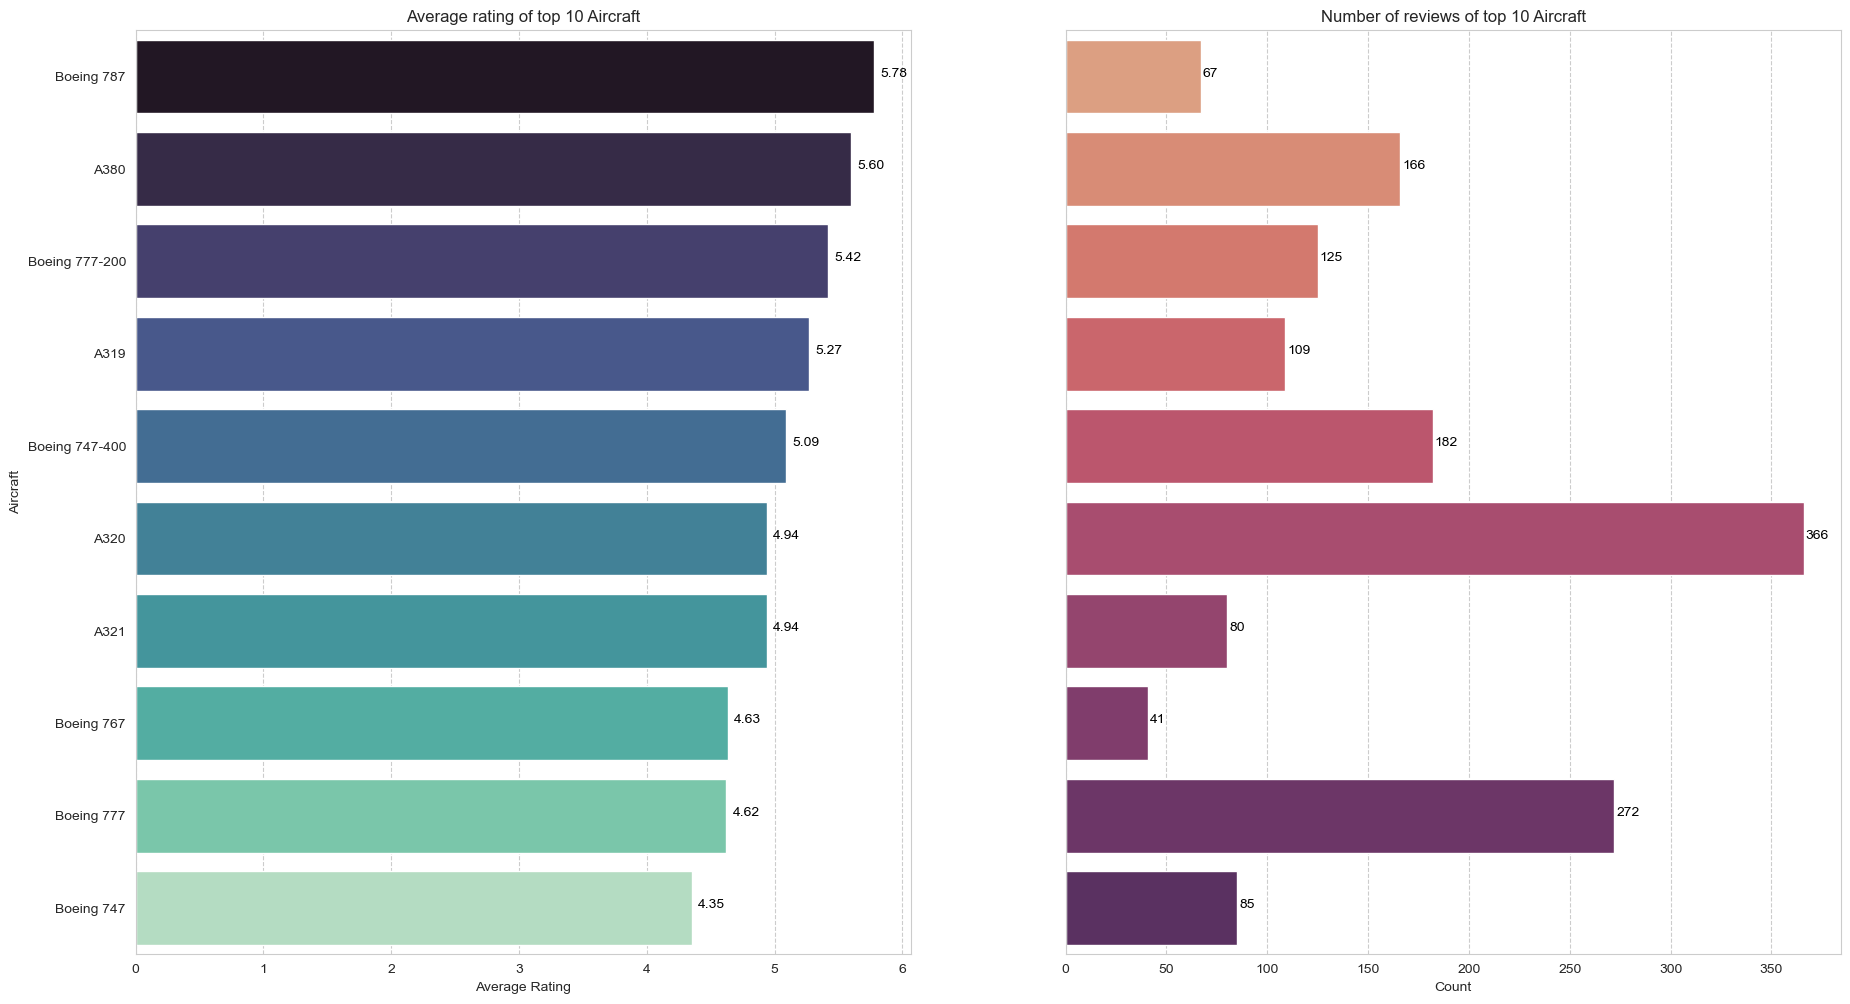

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,12), sharey = True)

# Generate a color palette from light blue to dark blue
color_palette1 = sns.color_palette("mako", len(avg_overall_group))
color_palette2 = sns.color_palette("flare", len(avg_overall_group))
num_bars = len(avg_overall_group)


sns.barplot(x='Average Rating', y='Aircraft', data=avg_overall_group, palette= color_palette1, ax = ax1)
ax1.set_title("Average rating of top 10 Aircraft")

# Add annotations to the bars
for index, row in enumerate(avg_overall_group['Average Rating'].tolist()):
    ax1.text(row + 0.05, index, f'{row:.2f}', color='black', ha="left")

sns.barplot(x='Count', y='Aircraft', data=avg_overall_group, palette= color_palette2, ax = ax2)
ax2.set_title("Number of reviews of top 10 Aircraft")

for index, row in enumerate(avg_overall_group['Count'].tolist()):
    ax2.text(row + 1, index, f'{row}', color='black', ha="left")

### Nhận xét:
- Biểu đồ cho thấy Boeing 787 là loại máy bay được đánh giá cao nhất trong số 10 loại máy bay được khảo sát, với đánh giá trung bình cao nhất.
- Airbus A119-300 là loại máy bay có số lượng đánh giá cao nhất, nhưng đánh giá trung bình chỉ ở mức trung bình.
- Nhìn chung, không có mối quan hệ rõ ràng giữa đánh giá trung bình và số lượng đánh giá. Một số loại máy bay có đánh giá trung bình cao nhưng số lượng đánh giá thấp (ví dụ: Boeing 787) và ngược lại (ví dụ: Boeing 777).
- Kết quả này có thể đến từ những ưu điểm vượt trội của dòng tàu bay như Boeing 787 và A380 đem đến cho hành khách cảm giác tiện nghi, thoải mái. Từ khảo sát này, ta cũng có thể thấy đa số hành khách lựa chọn tàu bày Airbus A320 và Boeing 777, điều này khảng định sự phổ thông của các dòng tàu bay này.


## Biều đồ 9
- Tiêu đề: Đánh giá trung bình theo 6 tiêu chí **SeatComfort, Cabin Staff Service, Ground Service, Value For Money, Food & Beverages, Inflight Entertainment** dựa trên tầng lớp của **Seat Type**

- Loại biểu đồ: Radar chart

- Lý do lựa chọn: Radar Chart là một biểu đồ đa diện được sử dụng để biểu thị dữ liệu đa chiều với các đặc trưng cho trước được đặt ở các trục khác nhau. Khi áp dụng cho thuộc tính **SeatComfort, Cabin Staff Service, Ground Service, Value For Money, Food & Beverages, Inflight Entertainment** và **Seat Type** ta sẽ có được điểm đánh giá trung bình theo 6 tiêu chí của từng tầng lớp, trong đó:
    - Điểm đánh giá trung bình **(SeatComfort, Cabin Staff Service, Ground Service, Value For Money, Food & Beverages, Inflight Entertainment)**: sẽ nằm ở các trục.
    - Màu sắc hình đa diện đại diện cho tầng lớp **(Economy Class, Business Class, First Class, Premium Class)**.


In [22]:
plot_df=df[['SeatComfort','CabinStaffService','GroundService','ValueForMoney','Food&Beverages','InflightEntertainment','SeatType']]

# Tính đánh giá trung bình cho mỗi cột theo từng nhóm 'SeatType'
avg_ratings = plot_df.groupby('SeatType').mean()

# Tạo danh sách các tiêu đề cho các cột
categories = avg_ratings.columns.tolist()

# Tạo biểu đồ radar
fig = go.Figure()

for seat_type, data in avg_ratings.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=data.values,
        theta=categories,
        fill='toself',
        name=seat_type
    ))

# Cập nhật layout của biểu đồ
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, 5]  # Đánh giá từ 1 đến 5
        )),
    font=dict(family="Franklin Gothic", size=17),
    title='Average Ratings by Seat Type',
    height=500,
    width=1000
)

# Hiển thị biểu đồ
fig.layout.template = 'plotly_dark'

fig.show()



### Nhận xét

Dựa vào biểu đồ Radar chart bên trên, ta có thể thấy: 
- Các hình lục giác chênh lệch không quá nhiều (chênh lệch < 1), cho thấy mức độ đánh giá điểm của các tầng lớp khá tương đồng.
- Điểm đánh giá trung bình của 6 tiêu chí đều rơi vào khoảng 2.6 - 4. Trong đó thấp là điểm **Food & Beverages** của Economy Class. Cao nhất là điểm **Cabin Staff Service** của First Class, với xấp xỉ 4.
- Ngoài ra, chúng ta có thể thấy tầng lớp càng cao thì hình lục giác càng rộng đều ra ở tất cả tiêu chí. Từ đó, ta thấy chất lượng dịch vụ đồng biến so với tầng lớp.

## Biểu đồ 10
- Tiêu đề: Liệu có sự khác biệt nào về đánh giá (SeatComfort, CabinStaffService, Food&Beverages) giữa các tầng lớp hành khách (SeatType) không?
- Loại biểu đồ: Box plot
- Lý do chọn:
    - Hiển thị phân phối dữ liệu: Biểu đồ boxplot cho phép chúng ta xem xét phân phối của dữ liệu cho mỗi nhóm SeatType. Điều này giúp chúng ta nhận biết được các đặc điểm của phân phối dữ liệu, bao gồm median, khoảng giữa, và các ngoại lệ (outliers).
    - So sánh biến thiên giữa các nhóm: Biểu đồ boxplot cho phép chúng ta so sánh sự biến thiên của các yếu tố đánh giá (SeatComfort, CabinStaffService, Food&Beverages) giữa các nhóm SeatType. Bằng cách so sánh các hộp (box) và dải (whiskers), chúng ta có thể đánh giá sự phân tán của dữ liệu và xác định xem có sự khác biệt đáng kể giữa các nhóm không.
    - Đánh giá sự phân phối và tương quan: Biểu đồ boxplot cung cấp cái nhìn tổng quan về sự phân phối và tương quan giữa các yếu tố đánh giá trong mỗi nhóm SeatType. Bằng cách nhìn vào độ cao của hộp, chiều dài của các dải và vị trí của median, chúng ta có thể đưa ra các nhận xét về sự phân bố và tương quan của dữ liệu.

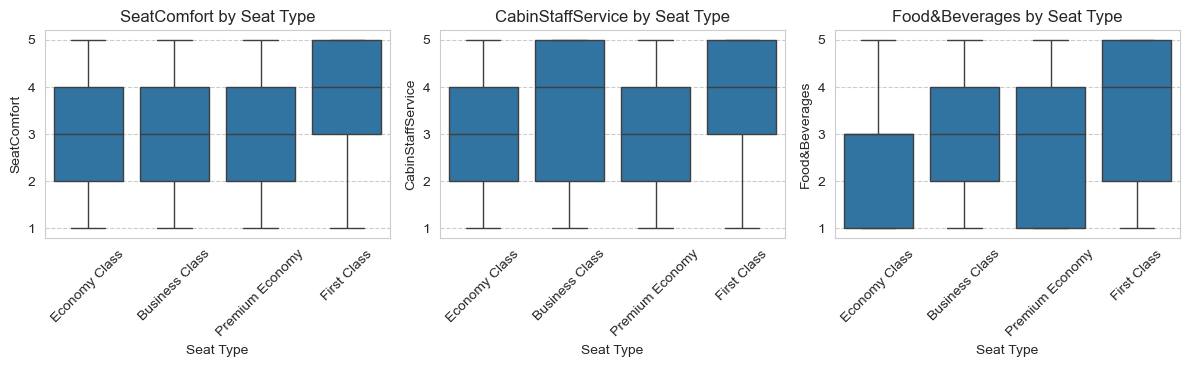

In [23]:
data = df[['SeatComfort', 'CabinStaffService', 'Food&Beverages', 'SeatType']]

# Vẽ biểu đồ Boxplot
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='SeatType', y=column, data=df)
    plt.title(f'{column} by Seat Type')
    plt.xlabel('Seat Type')
    plt.ylabel(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Nhận xét:
- Đối với đánh giá về SeatComfort:
    - Các Seat Type là Economy, Business và Premium Economy có phân phối tương tự nhau, rating từ 2-4 và median là 3.
    - First Class đánh giá cao hơn về SeatComfort (từ 3-5) và median là 4.
- Đối với Cabin Staff Service:
    - Economy và Premium Economy có chung sự đánh giá, phân phối từ 2-4.
    - Business có sự range đánh giá lớn hơn, phân phối từ 2-5 và median ở mức 4, nhìn chung cũng khá cao.
    - First Class đánh giá cao hơn các Seat Type trên, không có mức 2 và giá trị trải từ 3-5.
- Đối với Food&Beverages:
    - Xuất hiện rating ở mức 1 ở Economy và Premium Economy và có vẻ bị đánh giá khá thấp (chỉ từ 1-3) ở Economy và Premium Economy cao hơn 1 xíu (1-4).
    - Tuy nhiên, ở Business và First Class lại ở mức trung bình và cao, lần lượt phân phối là (2-4) và (2-5).
- **Kết luận:** Vậy qua biểu đồ, ta có thể thấy Cabin Staff Service được đánh giá cao nhất và Food&Beverages được đánh giá thấp nhất từ các tầng lớp của hành khách (Seat Type).

## Biểu đồ 11
- Tiêu đề: Thuộc tính nào ảnh hưởng đến Overall Rating nhiều nhất trong mô hình Random Forests.
- Loại biểu đồ: Bar chart.
- Lý do chọn:
    - Đơn giản và minh bạch: Biểu đồ cột là công cụ trực quan, giúp người đọc dễ dàng nhận biết yếu tố nào ảnh hưởng nhiều nhất đến Overall Rating. Sự khác biệt giữa các cột dễ dàng thu hút sự chú ý và hiểu được mức độ ảnh hưởng của từng yếu tố. Bằng cách so sánh chiều cao của các cột, người đọc có thể dễ dàng nhận ra yếu tố quan trọng nhất.
    - Phù hợp với dữ liệu không liên tục: Dữ liệu về mức độ ảnh hưởng của các yếu tố thường là rời rạc và không liên tục, biểu đồ cột là lựa chọn phù hợp nhất để biểu diễn thông tin này. Mỗi cột trên biểu đồ đại diện cho một yếu tố cụ thể, không cần các giá trị liên tục giữa chúng.
    - Thích hợp cho các nhóm dữ liệu: Trong trường hợp này, chúng ta có một số yếu tố cụ thể và biểu đồ cột là công cụ phù hợp để thể hiện mỗi yếu tố một cách rõ ràng và so sánh chúng với nhau.

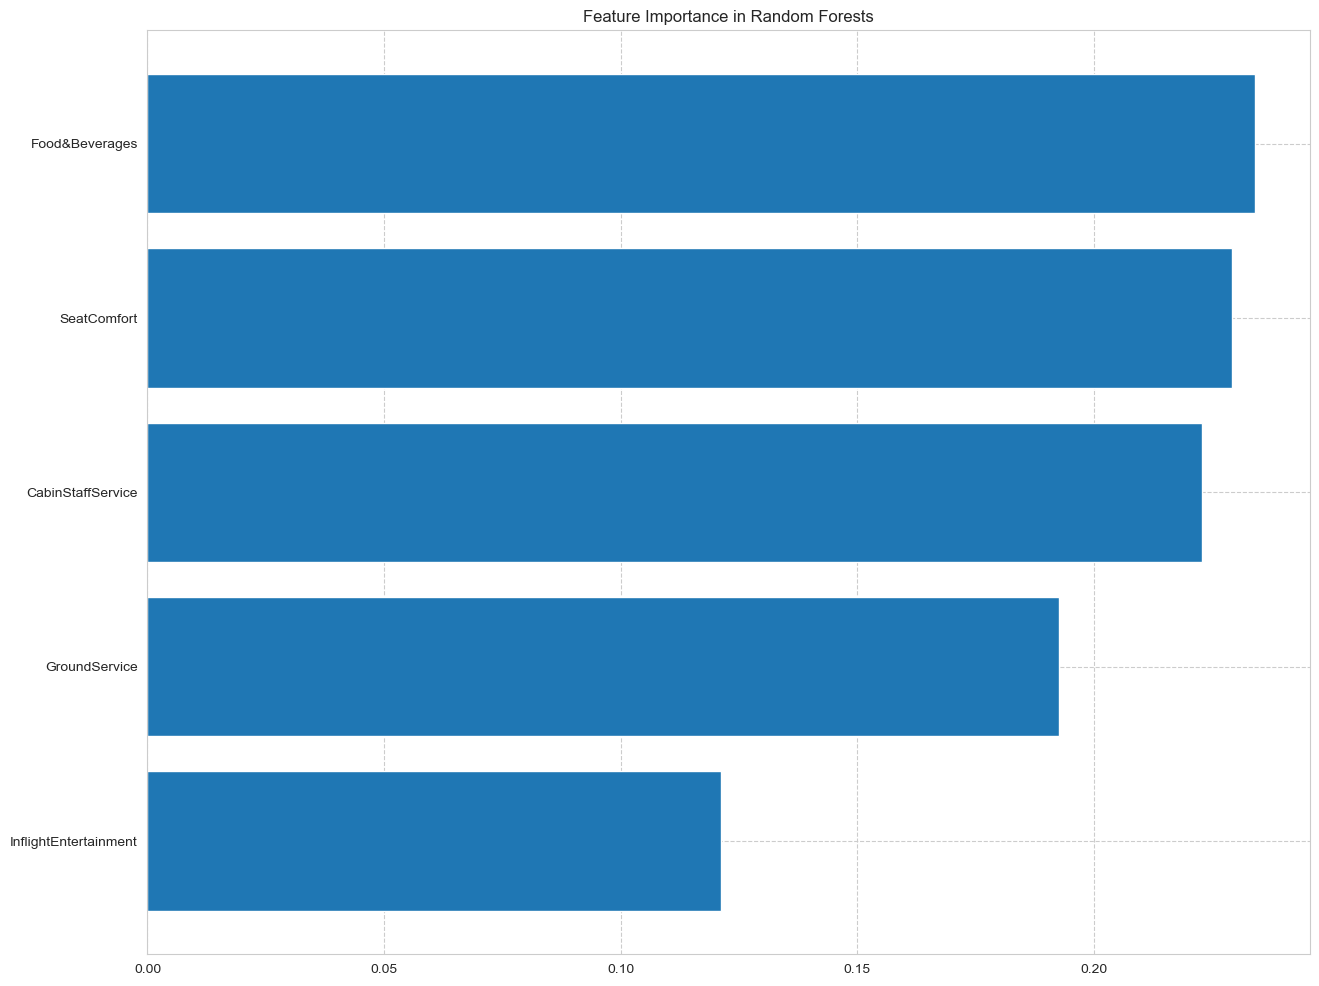

In [24]:
from sklearn.ensemble import RandomForestClassifier

df['OverallRatingType'] = np.where((df['OverallRating'] >= 1) & (df['OverallRating'] <= 3), 0, # poor
                               np.where((df['OverallRating'] >= 4) & (df['OverallRating'] <= 6), 1, # fair
                                        np.where((df['OverallRating'] >= 7) & (df['OverallRating'] <= 8), 2, # good
                                                 np.where((df['OverallRating'] >= 9) & (df['OverallRating'] <= 10), 3, # excellent
                                                          df['OverallRating']
                                                         )
                                                )
                                       )
                              )

df

X = df[['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'InflightEntertainment']]
y = df[['OverallRatingType']]

model = RandomForestClassifier()
model.fit(X, y)

f, ax=plt.subplots(figsize=(15,12))
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax)
ax.set_title('Feature Importance in Random Forests');

### Nhận xét:

- Food&Beverages và SeatComfort được xác định là hai yếu tố quan trọng nhất trong việc đánh giá trải nghiệm của hành khách trên chuyến bay. Sự ảnh hưởng của chúng đối với kết quả của mô hình là rất lớn, cho thấy mức độ quan trọng của việc cải thiện các dịch vụ ẩm thực và tiện nghi của hành khách.
- Trong khi đó, InflightEntertainment, mặc dù có sẵn trên một số chuyến bay, nhưng không ảnh hưởng đến mô hình một cách đáng kể. Việc loại bỏ nó khỏi mô hình không chỉ giúp tối ưu hóa hiệu suất mô hình mà còn giảm bớt phức tạp trong việc xử lý dữ liệu, từ đó tăng cường khả năng dự đoán chính xác của mô hình.

### Xây dựng mô hình học máy:

- Ta nhận thấy thuộc tính InflightEntertainment có độ quan trọng thấp hơn nhiều so với các thuộc tính còn lại. Do đó ta sẽ loại bỏ nó ra khỏi mô hình huấn luyện để tăng tốc độ và độ chính xác của mô hình học máy.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df[['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages']]
y = df[['OverallRatingType']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

maxs = max(scores)
maxs_idx = scores.index(maxs)
print(f"Accuracy score: {maxs} with n_estimators: {maxs_idx}")

Accuracy score: 0.7402597402597403 with n_estimators: 48


### Biếu đồ 12:
- Tiêu đề: Trung bình đánh giá của từng tệp khách hàng trên từng hạng ghế bay
- Loại biểu đồ: Bar Chart
- Lí do chọn: Sử dụng bar chart sẽ có thể trực quan nhất rằng trong từng hạng ghế bay, tệp khách hàng nào sẽ có trải nghiệm tốt nhất và tệp khách hàng nào sẽ có trải nghiệm tệ nhất. Không chỉ vậy, còn có thể dễ dàng so sánh giữa các hạng ghế bay khác nhau

In [26]:
ratingseat_df = df.pivot_table(index='SeatType', columns='TypeOfTraveller',values='OverallRating', aggfunc='mean', fill_value=0)
ratingseat_df

TypeOfTraveller  Business  Couple Leisure  Family Leisure  Solo Leisure
SeatType                                                               
Business Class   3.459649        5.340000        5.697674      5.635359
Economy Class    3.430189        3.801230        3.974359      4.544974
First Class      4.270270        5.951613        4.230769      6.704545
Premium Economy  3.666667        4.210000        3.615385      5.653061

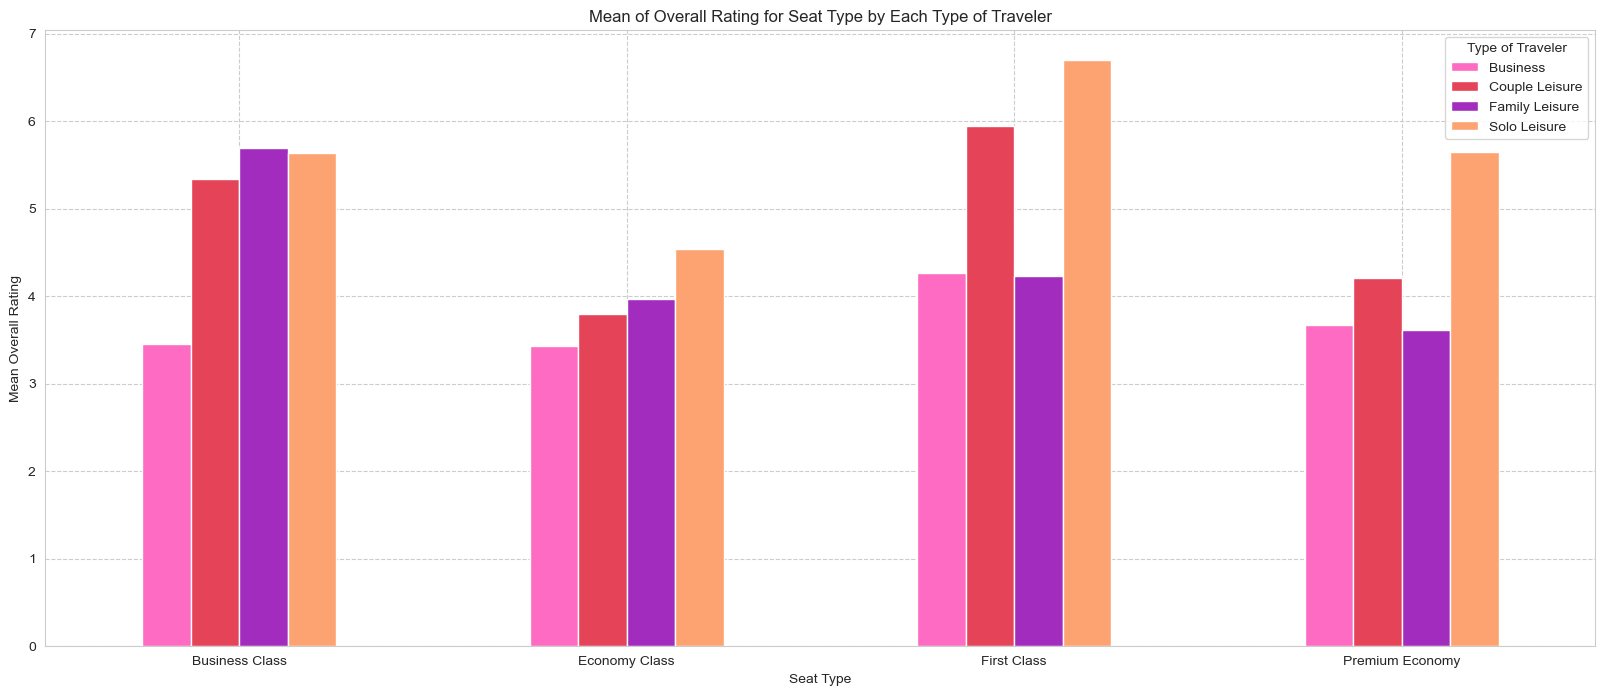

In [27]:
ratingseat_df.plot(kind='bar', figsize=(20, 8), color=['#fd6bc3', '#e44358', '#a22cbd', '#fca371'])
plt.title('Mean of Overall Rating for Seat Type by Each Type of Traveler')
plt.xlabel('Seat Type')
plt.xticks(rotation=0)
plt.ylabel('Mean Overall Rating')
plt.legend(title='Type of Traveler', loc='upper right')

### Nhận xét:
- Dựa vào biểu đồ, ta có thể thấy đa số các đánh giá của khách hàng khá xấu. Không có hạng ghế bay nào có điểm đánh giá trung bình của tệp khách hàng là trên 7.
- Ở hạng Business Class, trải nghiệm của tệp khách Business rất thấp so với 3 tệp khách còn lại với trải nghiệm khá tương tự nhau.
- Ở hạng Economy Class có điểm trung binh khá ổn định hơn so với các hạng ghế khác.
- Hạng First Class khiến tệp khách hàng Business và Family Leisure có trải nghiệm khá tệ khi trung bình điểm chỉ ở khoảng 4.
- Còn Premium Class, chỉ có duy nhất tệp Solo Leisure là cho điểm khá cao so với 3 tệp khách hàng còn lại, tuy nhiên chất lượng vẫn không quá đảm bảo khi điểm số chỉ ở tầm 5-6 điểm.